In [78]:
import pandas as pd
import numpy as np

In [79]:
df = pd.read_excel('data/titanic/train.xlsx', sheetname='train')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 存活率统计

In [29]:
df_0 = df[['Name', 'Pclass', 'Sex', 'Survived']]
survived_rate = {}
for pc in range(1,4):
    for sex in ['male', 'female']:
        df_1 = df_0[ (df_0.Sex == sex) & (df_0.Pclass == pc)]
        if sex not in survived_rate:
            survived_rate[sex] = {pc: df_1.Survived.mean()}
        else:
            survived_rate[sex][pc] = df_1.Survived.mean()
        print ('class %d, %s, survival rate: %.3f'% (pc, sex, survived_rate[sex][pc]))

class 1, male, survival rate: 0.369
class 1, female, survival rate: 0.968
class 2, male, survival rate: 0.157
class 2, female, survival rate: 0.921
class 3, male, survival rate: 0.135
class 3, female, survival rate: 0.500


课堂练习：用 `matplotlib` 对计算结果进行可视化

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

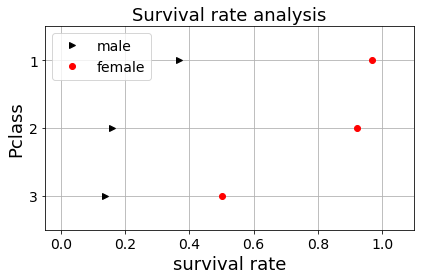

In [75]:
fig, ax = plt.subplots() #figsize=(5,4))
classes = range(1,4)
markers = ['k>', 'ro']
for i,sex in enumerate(['male', 'female']):
    rates = [survived_rate[sex][pc] for pc in classes]
    ax.plot(rates, classes[::-1], markers[i], label=sex)

ax.set_yticks(classes)
ax.set_yticklabels(['3', '2', '1']) 
ax.set_ylim(0.5,3.5) 
ax.set_xlim(-0.05, 1.1)
ax.tick_params(labelsize=14)
ax.grid()
ax.legend(fontsize=14)
ax.set_ylabel('Pclass', fontsize=18)
ax.set_xlabel('survival rate', fontsize=18)
ax.set_title('Survival rate analysis', fontsize=18)
plt.tight_layout()

用 `pivot_table` 实现生存率的统计

In [94]:
table = pd.pivot_table(df, values='Survived', index=['Pclass', 'Sex'], aggfunc=np.mean)
print type(table)
print table
print table.Survived.tolist()

<class 'pandas.core.frame.DataFrame'>
               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447
[0.9680851063829787, 0.36885245901639346, 0.9210526315789473, 0.1574074074074074, 0.5, 0.13544668587896252]


再看不同港口登船的生存率

In [99]:
table = pd.pivot_table(df, values='Survived', index=['Pclass', 'Sex'], columns=['Embarked'], aggfunc=np.mean)
table

Embarked              C         Q         S
Pclass Sex                                 
1      female  0.976744  1.000000  0.958333
       male    0.404762  0.000000  0.354430
2      female  1.000000  1.000000  0.910448
       male    0.200000  0.000000  0.154639
3      female  0.652174  0.727273  0.375000
       male    0.232558  0.076923  0.128302

读取测试数据

In [105]:
df = pd.read_excel('data/titanic/test_with_label.xlsx', sheetname='test')
df.head()
print df.shape
df.Sex.value_counts()

(418, 12)


male      266
female    152
Name: Sex, dtype: int64